In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695


In [3]:
del df["Lat"]
del df["Long"]

In [4]:
countries_df = df[["Province/State","Country/Region"]]
countries_df.head()

,Province/State,Country/Region
0,NaN,Afghanistan
1,NaN,Albania
2,NaN,Algeria
3,NaN,Andorra
4,NaN,Angola


In [5]:
days_df = df.copy()
del days_df["Province/State"]
del days_df["Country/Region"]

In [6]:
days_df = days_df.stack().reset_index()
days_df.columns=["country_id", "date", "count"]
days_df.head()

,country_id,date,count
0,0,1/22/20,0
1,0,1/23/20,0
2,0,1/24/20,0
3,0,1/25/20,0
4,0,1/26/20,0


In [7]:
df = pd.merge(countries_df, days_df, left_index=True, right_on="country_id")
del df["country_id"]
df["date"] = pd.to_datetime(df["date"])
df.head()

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


In [8]:
global_df = df.groupby(["date"],as_index=False).sum("count")

In [9]:
global_df.tail()

,date,count
473,2021-05-09,158330372
474,2021-05-10,158952301
475,2021-05-11,159690774
476,2021-05-12,160450873
477,2021-05-13,161176148


In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [11]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

<IPython.core.display.Javascript object>


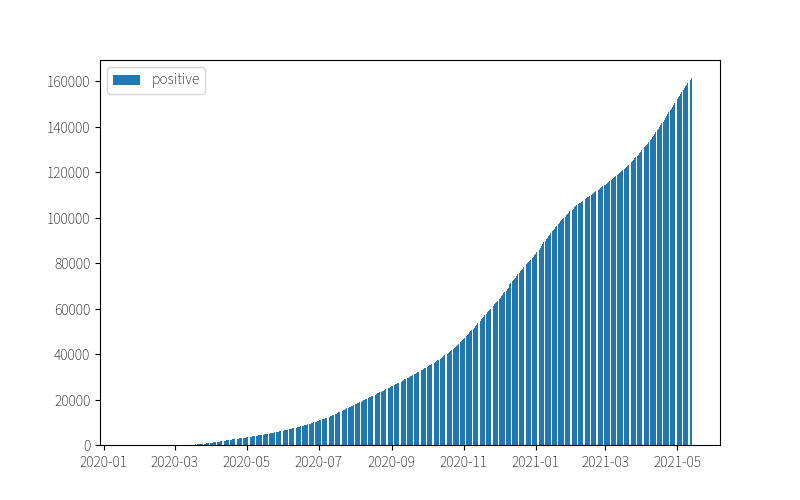

In [12]:
plt.figure(figsize=(8,5))
plt.bar(global_df["date"],global_df["count"]/1000,label="positive")
plt.legend()

In [13]:
trans = pd.DataFrame()
trans["date"] = global_df.iloc[1:]["date"]
trans["count1"] = global_df["count"].iloc[1:]
trans = trans.reset_index().drop(columns="index")
trans["count"] = trans["count1"] - global_df["count"].iloc[0:]
del trans["count1"]
trans["move_ave7"] = trans["count"].rolling(7).mean()


In [14]:
trans.head()

,date,count,move_ave7
0,2020-01-23,98.0,NaN
1,2020-01-24,286.0,NaN
2,2020-01-25,492.0,NaN
3,2020-01-26,685.0,NaN
4,2020-01-27,809.0,NaN


<IPython.core.display.Javascript object>


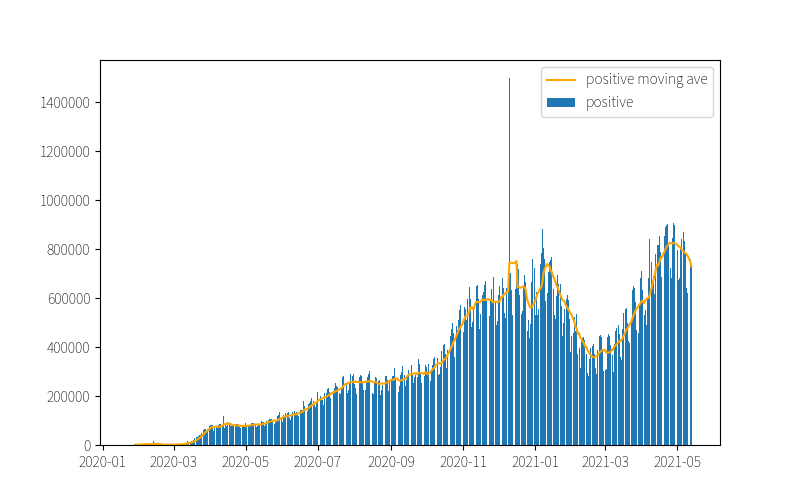

In [15]:
plt.figure(figsize=(8,5))
plt.bar(trans["date"],trans["count"],label="positive")
plt.plot_date(trans["date"],trans["move_ave7"],label="positive moving ave", fmt="-", color="orange")
plt.legend()

## 国別

In [16]:
df.head()

,Province/State,Country/Region,date,count
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Afghanistan,2020-01-23,0
2,NaN,Afghanistan,2020-01-24,0
3,NaN,Afghanistan,2020-01-25,0
4,NaN,Afghanistan,2020-01-26,0


In [17]:
countries = pd.DataFrame({"country":[
    "Japan",
    "US",
    "India",
    "Sweden",
    "Brazil",
    "Korea, South"
]})
dates = df["date"].unique()

In [18]:
c_df = pd.merge(countries, df, left_on="country", right_on="Country/Region", how="inner")[["country","date","count"]]

In [19]:
c_df

,country,date,count
0,Japan,2020-01-22,2
1,Japan,2020-01-23,2
2,Japan,2020-01-24,2
3,Japan,2020-01-25,2
4,Japan,2020-01-26,4
...,...,...,...
2863,"Korea, South",2021-05-09,127772
2864,"Korea, South",2021-05-10,128283
2865,"Korea, South",2021-05-11,128918
2866,"Korea, South",2021-05-12,129633


In [20]:
c_df.groupby("country").count()

,date,count
country,,
Brazil,478,478
India,478,478
Japan,478,478
"Korea, South",478,478
Sweden,478,478
US,478,478


In [21]:
len(dates)

478

In [22]:
c_trans = c_df.copy()
c_trans["inc_count"] = 0
for c in countries["country"]:
    yday_t = c_trans.loc[c_trans["country"]==c].reset_index()
    t = yday_t.iloc[1:].reset_index()
    t["inc_count"] = t["count"] - t.join(yday_t,rsuffix="_y")["count_y"]
    c_trans.loc[(c_trans["country"]==c) & (c_trans["date"]>=t["date"].min()),"inc_count"] = t["inc_count"].values.tolist()
    c_trans.loc[(c_trans["country"]==c),"move_ave7"] = c_trans.loc[c_trans["country"]==c]["count"].rolling(7).mean()
pd.concat([c_trans.head(2),c_trans.tail(2)])


,country,date,count,inc_count,move_ave7
0,Japan,2020-01-22,2,0,NaN
1,Japan,2020-01-23,2,0,NaN
2866,"Korea, South",2021-05-12,129633,715,127814.857143
2867,"Korea, South",2021-05-13,130380,747,128434.285714


In [23]:
c_trans[c_trans["country"]=="Japan"].head()

,country,date,count,inc_count,move_ave7
0,Japan,2020-01-22,2,0,NaN
1,Japan,2020-01-23,2,0,NaN
2,Japan,2020-01-24,2,0,NaN
3,Japan,2020-01-25,2,0,NaN
4,Japan,2020-01-26,4,2,NaN


<IPython.core.display.Javascript object>


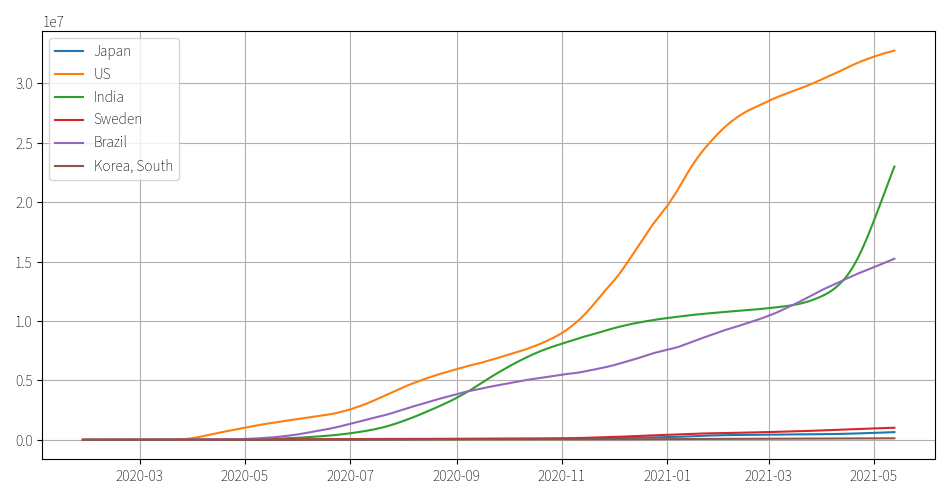

In [24]:
plt.figure(figsize=(9.5,5))
plt.grid()
dates = c_trans["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
plt.legend()
plt.tight_layout()

## 人口当たり

In [25]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]
pop_latest.columns = ["un_country","population"]
pop_latest.head(1)

,un_country,population
26,Burundi,11890.781


In [26]:
alternates = pd.DataFrame([
    ("US","United States of America"),
    ("Russia","Russian Federation"),
    ("Iran","Iran (Islamic Republic of)"),
    ("Bolivia","Bolivia (Plurinational State of)"),
    ("Moldova","Republic of Moldova"),
    ("Venezuela","Venezuela (Bolivarian Republic of)"),
    ("Korea, South","Republic of Korea"),
    ("Congo (Kinshasa)","Democratic Republic of the Congo"),
    ("Congo (Brazzaville)","Congo"),
    ("Vietnam","Viet Nam"),
    ("Laos","Lao People's Democratic Republic"),
    ("Taiwan*","China, Taiwan Province of China"),
    ("Tanzania","United Republic of Tanzania"),
    ("Brunei","Brunei Darussalam"),
    ("Micronesia","Micronesia (Fed. States of)"),
    ("Syria","Syrian Arab Republic"),
], columns = ["covid_country","un_country"])

In [27]:
alternates.head()

,covid_country,un_country
0,US,United States of America
1,Russia,Russian Federation
2,Iran,Iran (Islamic Republic of)
3,Bolivia,Bolivia (Plurinational State of)
4,Moldova,Republic of Moldova


In [28]:
c_trans_pop = pd.merge(c_trans, alternates, left_on="country", right_on="covid_country", how="left")
#c_trans_pop["country"].replace(renames,inplace=True)
del c_trans_pop["covid_country"]

In [29]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country
0,Japan,2020-01-22,2,0,NaN,NaN
1,Japan,2020-01-23,2,0,NaN,NaN
2,Japan,2020-01-24,2,0,NaN,NaN
3,Japan,2020-01-25,2,0,NaN,NaN
4,Japan,2020-01-26,4,2,NaN,NaN


In [30]:
c_trans_pop.isnull().any(axis=0)

country       False
date          False
count         False
inc_count     False
move_ave7      True
un_country     True
dtype: bool

In [31]:
c_trans_pop["un_country"].fillna(c_trans_pop["country"],inplace=True)

In [32]:
c_trans_pop.isnull().any(axis=0)

country       False
date          False
count         False
inc_count     False
move_ave7      True
un_country    False
dtype: bool

In [33]:
c_trans_pop = pd.merge(c_trans_pop, pop_latest, on="un_country", how="left")

In [34]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country,population
0,Japan,2020-01-22,2,0,NaN,Japan,126476.458
1,Japan,2020-01-23,2,0,NaN,Japan,126476.458
2,Japan,2020-01-24,2,0,NaN,Japan,126476.458
3,Japan,2020-01-25,2,0,NaN,Japan,126476.458
4,Japan,2020-01-26,4,2,NaN,Japan,126476.458


In [35]:
c_trans_pop["count_per_mil_pop"] = c_trans_pop["count"] / (c_trans_pop["population"] / 1000)

In [36]:
c_trans_pop.head()

,country,date,count,inc_count,move_ave7,un_country,population,count_per_mil_pop
0,Japan,2020-01-22,2,0,NaN,Japan,126476.458,0.015813
1,Japan,2020-01-23,2,0,NaN,Japan,126476.458,0.015813
2,Japan,2020-01-24,2,0,NaN,Japan,126476.458,0.015813
3,Japan,2020-01-25,2,0,NaN,Japan,126476.458,0.015813
4,Japan,2020-01-26,4,2,NaN,Japan,126476.458,0.031626


In [37]:
#c_trans_pop["move_ave7_milpop"] = 0
for c in countries["country"]:
    c_trans_pop.loc[(c_trans_pop["country"]==c),"move_ave7_milpop"] = c_trans_pop.loc[c_trans_pop["country"]==c]["count_per_mil_pop"].rolling(7).mean()

In [38]:
c_trans_pop.loc[c_trans_pop["country"]=="Japan"].tail()


,country,date,count,inc_count,move_ave7,un_country,population,count_per_mil_pop,move_ave7_milpop
473,Japan,2021-05-09,642146,6578,624234.714286,Japan,126476.458,5077.197845,4935.580298
474,Japan,2021-05-10,647003,4857,629574.428571,Japan,126476.458,5115.600249,4977.799335
475,Japan,2021-05-11,653363,6360,635223.142857,Japan,126476.458,5165.886287,5022.461515
476,Japan,2021-05-12,660884,7521,641365.142857,Japan,126476.458,5225.351899,5071.023912
477,Japan,2021-05-13,667251,6367,647790.571429,Japan,126476.458,5275.693284,5121.827269


<IPython.core.display.Javascript object>


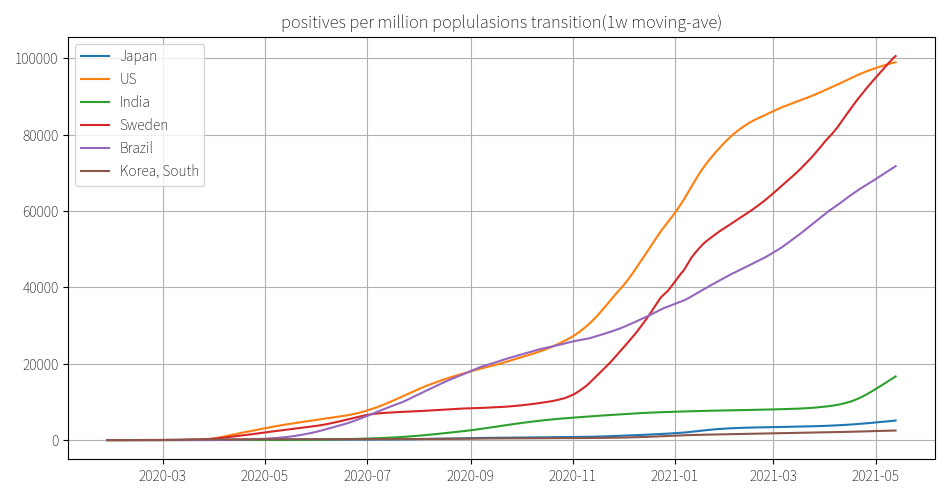

In [41]:
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)")
dates = c_trans_pop["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans_pop.loc[c_trans_pop["country"]==c]["move_ave7_milpop"],label=c, fmt="-")

#for c in countries["country"]:
#    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


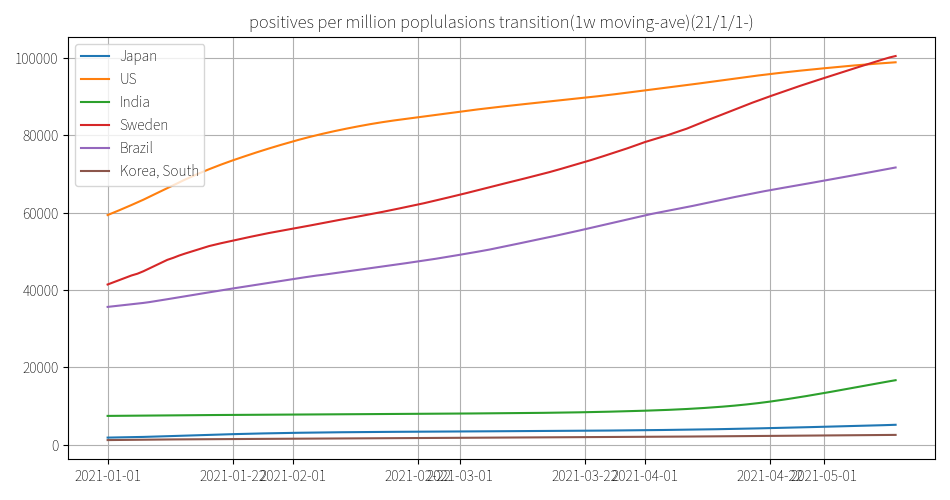

In [43]:
plt.figure(figsize=(9.5,5))
plt.grid()
plt.title("positives per million poplulasions transition(1w moving-ave)(21/1/1-)")
dates = c_trans_pop.loc[c_trans_pop["date"]>="2021-01-01"]["date"].unique()
for c in countries["country"]:
    plt.plot_date(dates,c_trans_pop.loc[(c_trans_pop["country"]==c) & (c_trans_pop["date"]>="2021-01-01")]["move_ave7_milpop"],label=c, fmt="-")

#for c in countries["country"]:
#    plt.plot_date(dates,c_trans.loc[c_trans["country"]==c]["move_ave7"],label=c, fmt="-")
    
plt.legend()
plt.tight_layout()